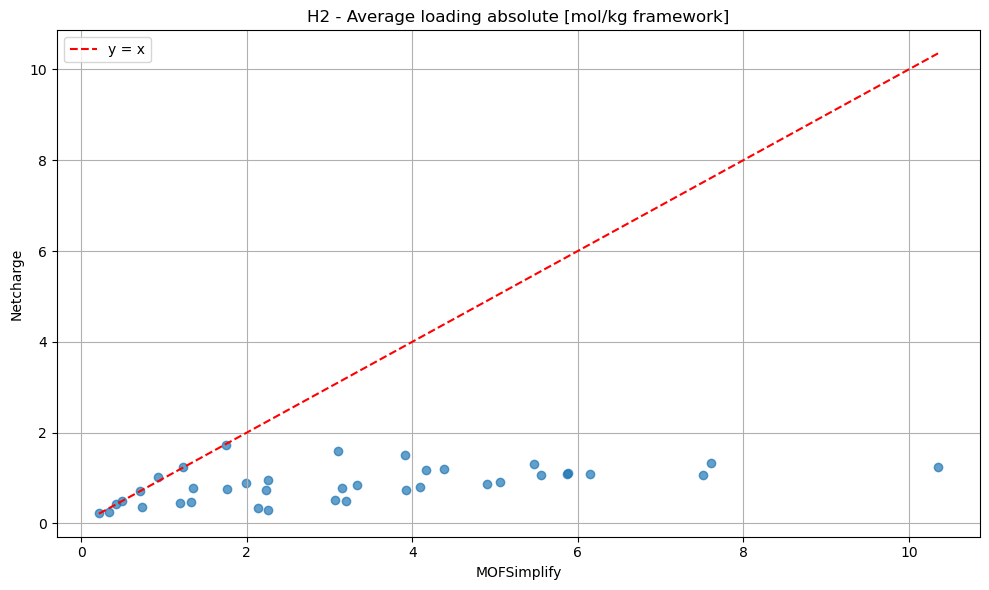

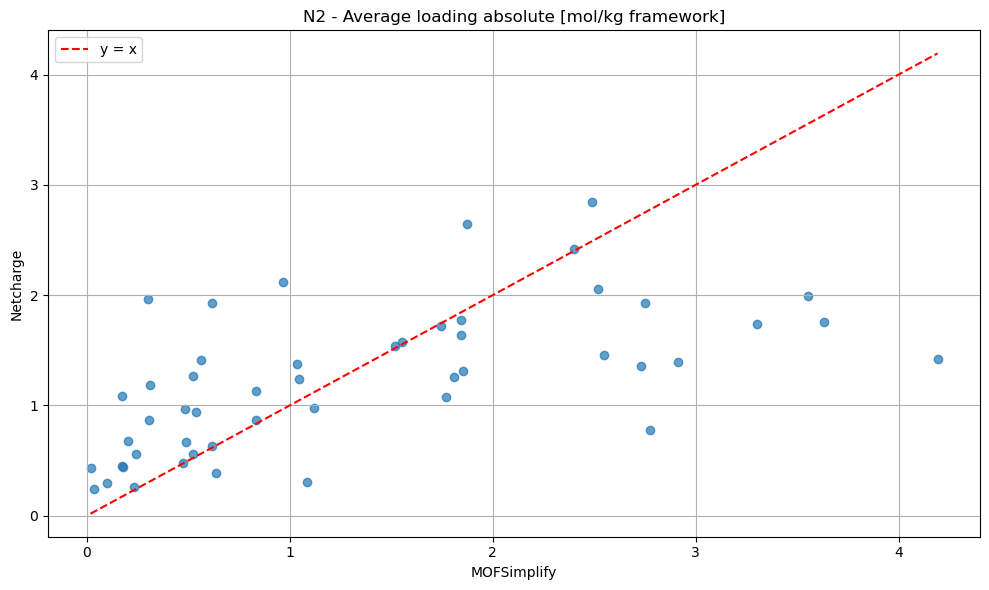

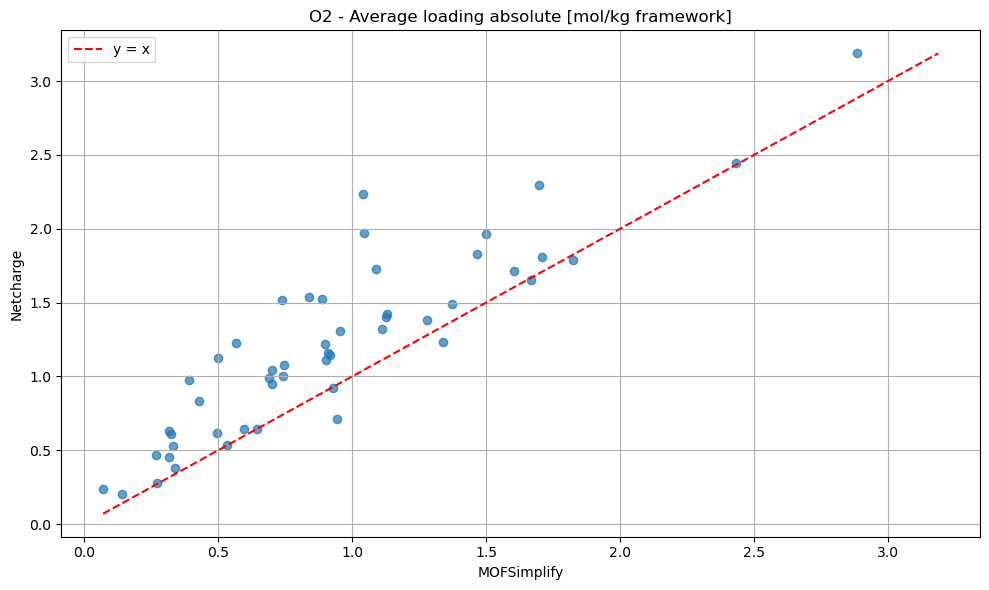

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def load_data(gas_name):
    base_path_mofsimplify = f"./nousecharge/{gas_name}_298K_5barmofsimplify_list_seed42_50_part1/07result.csv"
    base_path_netcharge = f"./Usecharge/{gas_name}_298K_5barmofsimplify_list_seed42_50_part1/07result.csv"

    # 데이터 읽기
    mofsimplify_df = pd.read_csv(base_path_mofsimplify)
    netcharge_df = pd.read_csv(base_path_netcharge)

    # 필요한 열 추출 및 이름 변경
    mofsimplify_df = mofsimplify_df[["name", "Average loading absolute [mol/kg framework]"]].rename(
        columns={"Average loading absolute [mol/kg framework]": "MOFSimplify"}
    )
    netcharge_df = netcharge_df[["name", "Average loading absolute [mol/kg framework]"]].rename(
        columns={"Average loading absolute [mol/kg framework]": "Netcharge"}
    )

    # 병합
    merged_df = pd.merge(mofsimplify_df, netcharge_df, on="name")
    return merged_df

# 시각화 함수
def plot_comparison(df, gas_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(df["MOFSimplify"], df["Netcharge"], alpha=0.7)
    
    min_val = min(df["MOFSimplify"].min(), df["Netcharge"].min())
    max_val = max(df["MOFSimplify"].max(), df["Netcharge"].max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="y = x")
    
    plt.xlabel("MOFSimplify")
    plt.ylabel("Netcharge")
    plt.title(f"{gas_name} - Average loading absolute [mol/kg framework]")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 기체별 시각화 실행
for gas in ["H2", "N2", "O2"]:
    df = load_data(gas)
    plot_comparison(df, gas)
